In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

times = pd.read_csv("https://raw.githubusercontent.com/po-gl/ConstrainedHiddenMarkovModel/master/time_analysis/MarkovRunningTimes.csv")
times = times[5:]

times['average_train_time'] = times['average_train_time'].apply(lambda x : float(x[:-2]))
times['average_gen_time'] = times['average_gen_time'].apply(lambda x : float(x[:-2])/1000)

In [ ]:
times['average_train_time']

5       2.321
6       2.525
7       3.211
8       3.454
9       4.252
       ...   
91    178.610
92    180.195
93    186.167
94    187.990
95    193.527
Name: average_train_time, Length: 91, dtype: float64

In [ ]:
times.head(100)

,alphabet_size,average_train_time,average_gen_time
5,10,2.321,0.035283
6,11,2.525,0.030950
7,12,3.211,0.035642
8,13,3.454,0.035516
9,14,4.252,0.031166
...,...,...,...
91,96,178.610,0.049583
92,97,180.195,0.069341
93,98,186.167,0.057199
94,99,187.990,0.063275


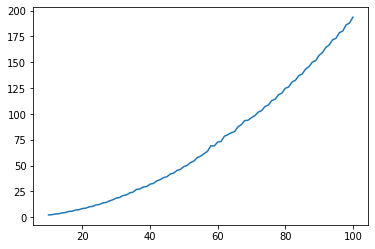

In [ ]:
plt.plot(times['alphabet_size'], times['average_train_time'])

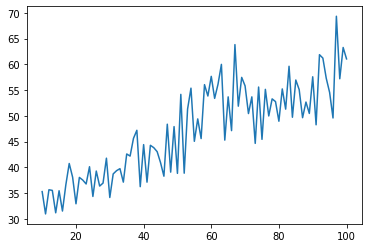

In [ ]:
plt.plot(times['alphabet_size'], times['average_gen_time'])

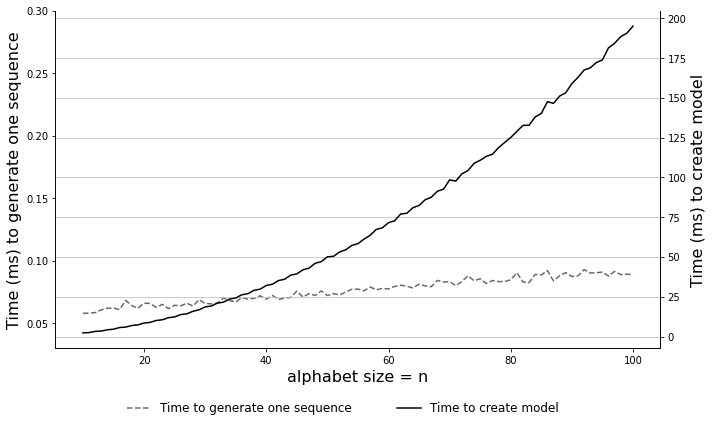

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'black'
ax1.set_xlabel('alphabet size = n', fontsize=16)
ax1.set_ylabel('Time (ms) to generate one sequence', color=color, fontsize=16)
ax1.plot(times['alphabet_size'], times['average_gen_time'], label='Time to generate one sequence', color='dimgray', linestyle='dashed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.030, 0.3])
ax2 = ax1.twinx()

color = 'black'
ax2.set_ylabel('Time (ms) to create model', color=color, fontsize=16)
ax2.plot(times['alphabet_size'], times['average_train_time'], label='Time to create model', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(color='silver')

ax1.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.1, -0.23), fontsize=12)
ax2.legend(frameon=False, loc='lower right', bbox_to_anchor=(0.85, -0.23), fontsize=12)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()

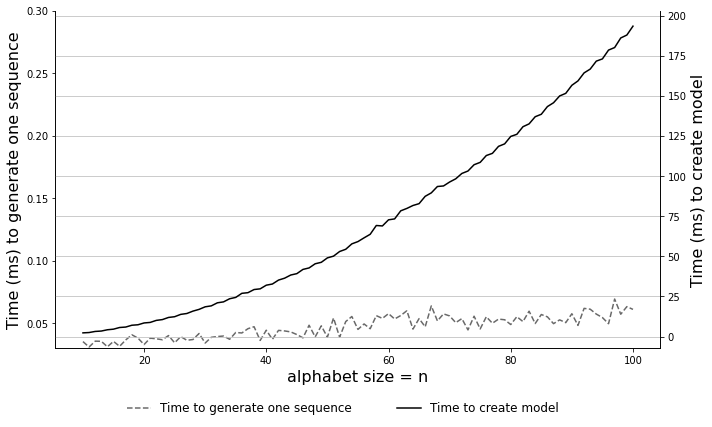

In [ ]:
times = pd.read_csv("https://raw.githubusercontent.com/po-gl/ConstrainedHiddenMarkovModel/master/time_analysis/MarkovRunningTimesLengths.csv")

for i,row in times.iterrows():
  if row['average_train_time'][-2:] == 'ms':
    times.at[i, 'average_train_time'] = float(row['average_train_time'][:-2])

  if row['average_gen_time'][-2:] == 'µs':
    times.at[i, 'average_gen_time'] = float(row['average_gen_time'][:-2])/1000
  if row['average_gen_time'][-2:] == 'ms':
    times.at[i, 'average_gen_time'] = float(row['average_gen_time'][:-2])

for i,row in times.iterrows():
  if str(row['average_train_time'])[-1:] == 's':
    times.at[i, 'average_train_time'] = float(row['average_train_time'][:-1])*1000

# print(times.head())
# print(times.tail(50))

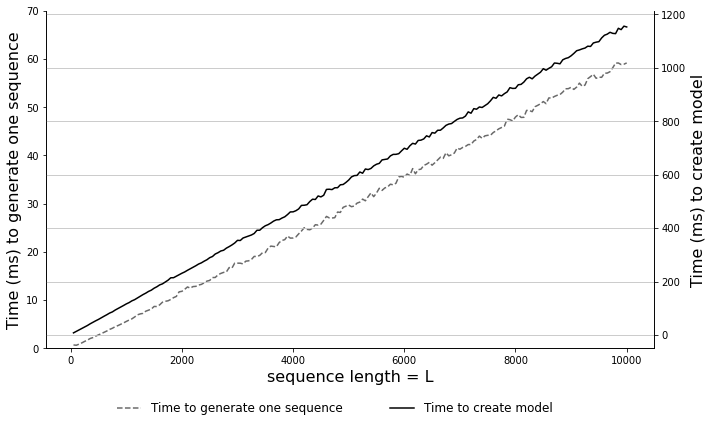

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'black'
ax1.set_xlabel('sequence length = L', fontsize=16)
ax1.set_ylabel('Time (ms) to generate one sequence', color=color, fontsize=16)
ax1.plot(times['sequence_length'], times['average_gen_time'], label='Time to generate one sequence', color='dimgray', linestyle='dashed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0.0, 70.0])
ax2 = ax1.twinx()

color = 'black'
ax2.set_ylabel('Time (ms) to create model', color=color, fontsize=16)
ax2.plot(times['sequence_length'], times['average_train_time'], label='Time to create model', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(color='silver')

ax1.legend(frameon=False, loc='lower left', bbox_to_anchor=(0.1, -0.23), fontsize=12)
ax2.legend(frameon=False, loc='lower right', bbox_to_anchor=(0.85, -0.23), fontsize=12)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()